## Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

## Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank

## Data Dictionary:
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

### Importing necessary libraries

In [1]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

!pip install imblearn

## Load and view the dataset

In [2]:
data = pd.read_csv('BankChurners.csv')

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
data.shape

(10127, 21)

Dataset has 10127 Rows & 21 Columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
data.isnull().any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

Dataset has no missing values. However, we will still check further for any "Unknown" values, if any.

**Let's check the number of unique values in each column**

In [7]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

We can drop the column - `CLIENTNUM`, as it is unique for each customer and will not add value to the model.

In [8]:
# Dropping columns - CLIENTNUM
data.drop(columns=["CLIENTNUM"], inplace=True)

**Summary of the data**

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


- `Customer_Age` looks normally distributed.
- 75% of customers have less than 3 `Dependent_count`.
- `Months_on_book` loks normally distribute with 50% of customers having relationship with bank since last 36 months.
- `Months_Inactive_12_mon` & `Contacts_Count_12_mon` looks normally distributed with 50% of customers being inactive since last 2 months or have contacted the bank only twice.
- `Credit_Limit` has some large valuers indicating outliers.
- `Avg_Utilization_Ratio` looks normally distributed

In [10]:
data.describe(include=['object']).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


1.  Dataset is imbalanced with more Existing customers than Attrited ones.
2.  Majority of customers
    - are Females
    - are Graduates
    - are Married
    - have Less than $40K salary
    - have Blue category card

In [169]:
cat_col = [col for col in data.columns if data[col].nunique() <= 7]
print(cat_col)
num_col = [col for col in data.columns if data[col].nunique() > 7]
print(num_col)

['Attrition_Flag', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


### Check the target variable

##### Amount of churned customers
How many customers have churned?

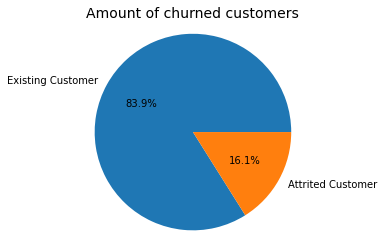

In [179]:
target = data["Attrition_Flag"].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

It's clear that the majority of our customers (83.9 %) stays. Since "attrited" or "churned" label is less then 20% of the total all customers. We can say that we have an imbalanced data. Upsampling will be required to receive a better results.

In [180]:
# Lets create a function for pie plot

def plot_pie(column):
    target = data[column].value_counts()    
    fig1, ax1 = plt.subplots()    
    ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
    ax1.axis('equal')
    plt.title(column, fontsize=14)
    plt.show()

### Checking the discrete varibales

#### 1. Age compared to the churn

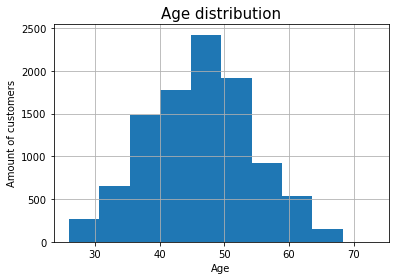

In [13]:
# Checking the overall distribution
data["Customer_Age"].hist()
plt.xlabel("Age")
plt.ylabel("Amount of customers")
plt.title("Age distribution", fontsize=15)
plt.show()

The age is normally distributed. There is no clear difference between the age distribution.

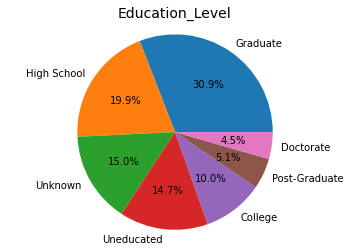

In [181]:
plot_pie("Education_Level")

The majority of people have a graduate education level followed by high school. 15% of the population has an unknown education level.

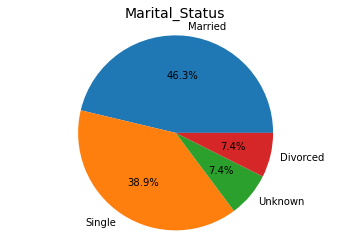

In [110]:
plot_pie("Marital_Status")

The main part of the population is married. 

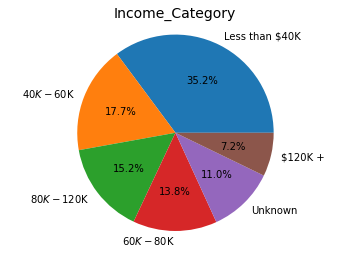

In [111]:
plot_pie("Income_Category")

We notice that the larget amount of our customers earn less then $40k a year.

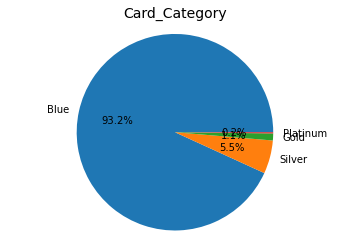

In [112]:
plot_pie("Card_Category")

We can clearly see that most of our customers have the "Blue" card. 

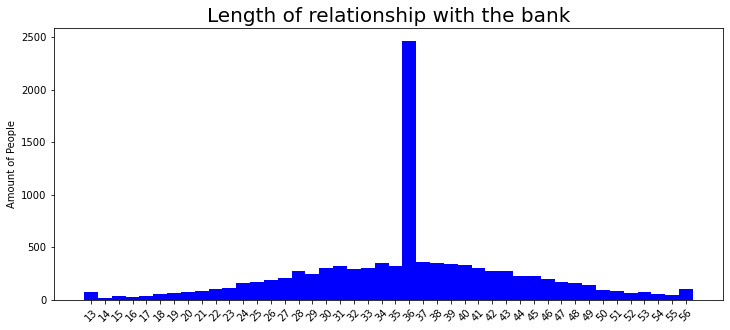

In [25]:
column = "Months_on_book"

N = len(data[column].unique())
DataCounts = data[column].value_counts().sort_index()

ind = np.arange(N) 
width = 1       

figs, axs = plt.subplots(figsize=(12,5))

axs.bar(ind, DataCounts, width, color='b')
axs.set_ylabel('Amount of People')
axs.set_title('Length of relationship with the bank', fontsize=20)
axs.set_xticks(ind)
axs.set_xticklabels(DataCounts.index.tolist(), rotation=45)

plt.show()

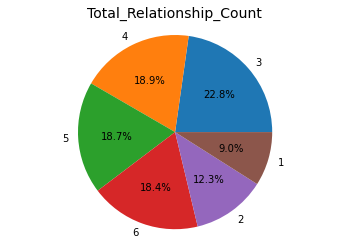

In [113]:
plot_pie("Total_Relationship_Count")

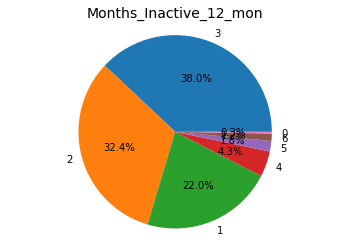

In [114]:
plot_pie("Months_Inactive_12_mon")

It's clear that the most of the customers show a 3 month inactivity. 

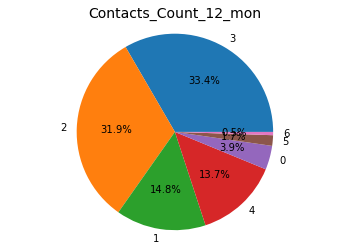

In [115]:
plot_pie("Contacts_Count_12_mon")

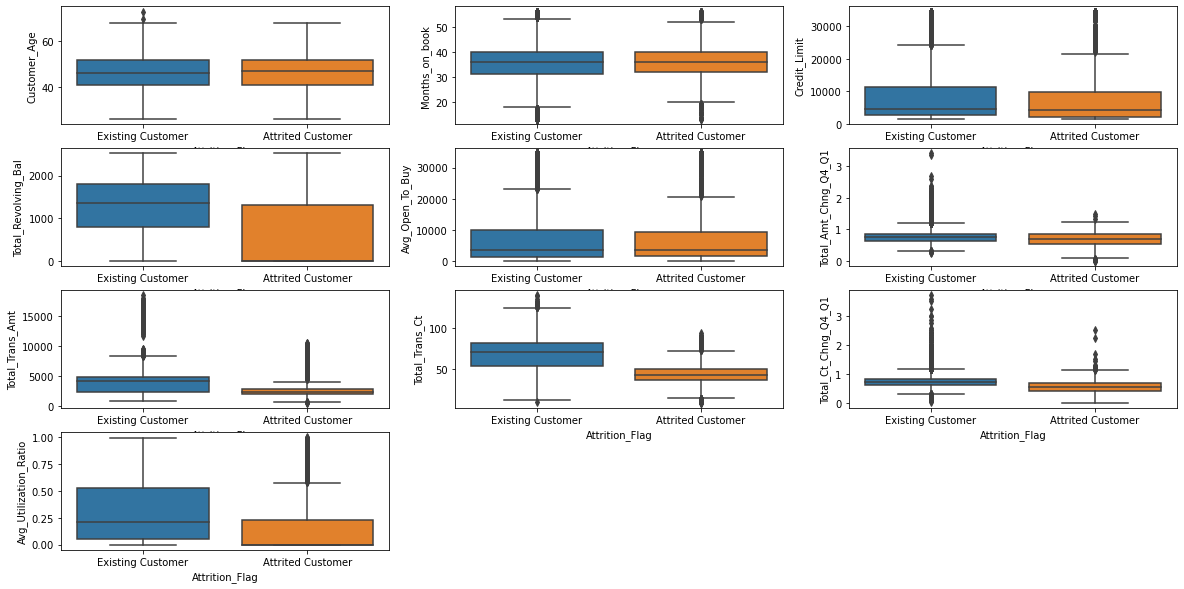

In [176]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(num_col):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(x=data['Attrition_Flag'], y=data[col])

* `Total_Revolving_Bal` : Most chruning customers have revolving balance less thab 1500.
* `Total_Trans_Amt` : Majority of churning customers tend to have less total transaction amount than non-churning customers.
* `Total_Trans_Ct` : Majority of Chruning customers tend to have less than 50 transaction counts.
* `Avg_Utilization_Ratio` : Majority of churning customers have an average utilization ratio less than 0.25.

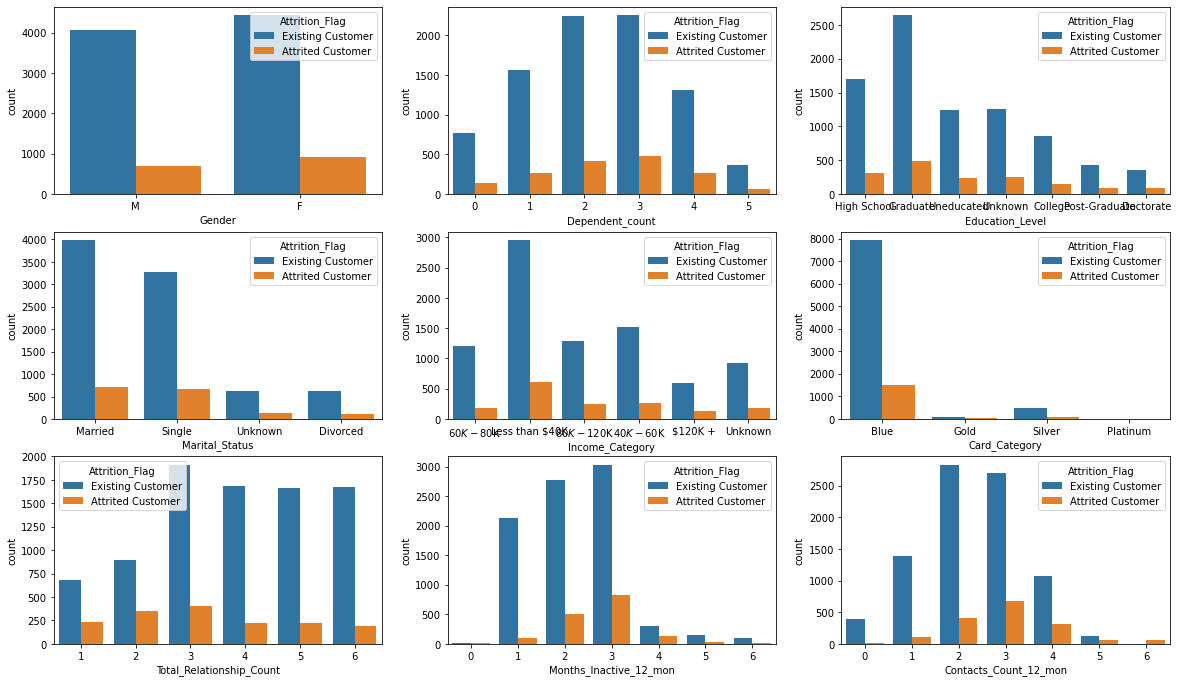

In [177]:
cat_col.remove('Attrition_Flag')  # Removing the target variable
fig=plt.figure(figsize=(20,20))
for i,col in enumerate(cat_col):
    ax=fig.add_subplot(5,3,i+1)
    sns.countplot(x=data[col],hue=data['Attrition_Flag'])

* `Gender` : There is not a significant difference, but Females are slightly more likely to churn than males.
* `Dependent_count` : No clear shift is visible when comparing the churned and non-churned distribution.
* `Education level` : Distribution of the churn/nonchurned customers shows no difference.
* `Marital_status` : Both churn and non churned have the same distribution.
* `Income_Category` : No visible difference in churned & non-churned distribution.
* `Card_category` : The distribution of churned/not churned is the same.
* `Total_Relationship_Count` : Here we see a shift in the distribution when we compare the churned vs the nonchurned. It's clear that the non churned customers tend to buy more products then the churned customers.
* `Months_Inactive_12_mon` : It can be said that most of the active members (less then 3 months) can be found within the non churning customers.

### Correlation plot

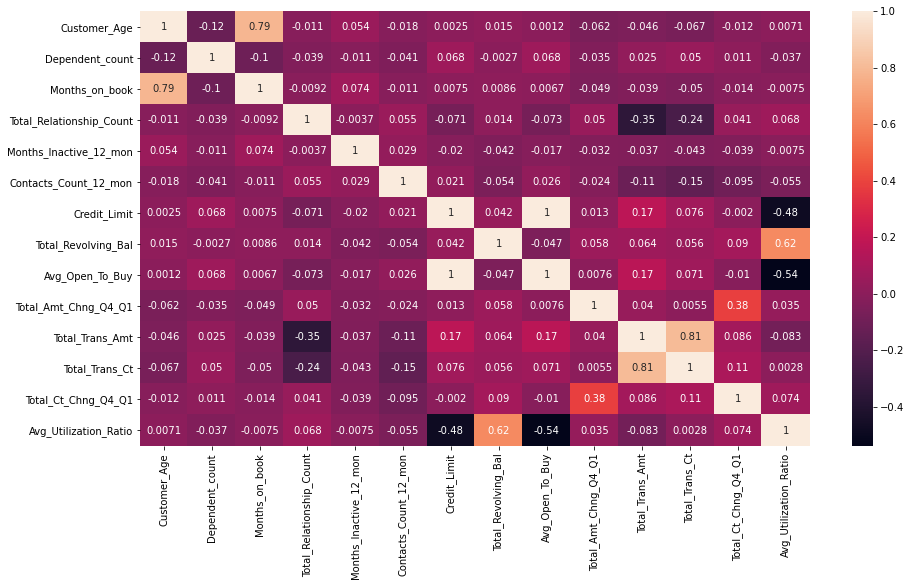

In [52]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

* `Avg_Open_To_Buy` & `Credit_Limit` have a correlation of 1. Hence, we can drop `Avg_Open_To_Buy`.
* `Months_on_book` & `Customer_Age` are highly correlated. `Months_on_book` can be dropped.
* `Total_Trans_Amt` & `Total_Trans_Ct` are highly correlated. `Total_Trans_Amt` can be dropped.

### Missing value treatment
* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.

In [53]:
imputer = KNNImputer(n_neighbors=5)

In [54]:
reqd_col_for_impute = ['Education_Level','Income_Category','Marital_Status']

In [55]:
data1=data.copy()

In [56]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
Education_Level = {'High School':1,'Graduate':3,'Uneducated':0,'College':2,'Post-Graduate':4,'Doctorate':5}
data1['Education_Level'] = data1['Education_Level'].map(Education_Level)

Income_Category = {'$60K - $80K':2,'Less than $40K':0, '$80K - $120K':3,'$40K - $60K':1,'$120K +':4}
data1['Income_Category'] = data1['Income_Category'].map(Income_Category)

Marital_Status = {'Single':0, 'Married':1, 'Divorced':2}
data1['Marital_Status'] = data1['Marital_Status'].map(Marital_Status)


In [57]:
data1.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,1.0,1.0,2.0,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,3.0,0.0,0.0,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,3.0,1.0,3.0,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,1.0,NaN,0.0,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,0.0,1.0,2.0,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,3.0,1.0,1.0,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,NaN,1.0,4.0,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,1.0,NaN,2.0,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,0.0,0.0,2.0,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,3.0,0.0,3.0,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


### Split data

In [58]:
X = data1.drop(["Attrition_Flag"],axis=1)
y = data1['Attrition_Flag'].apply(lambda x : 1 if x=='Attrited Customer' else 0)

In [59]:
# Dropping birth year and Dt_Customer columns
X.drop(
    columns=[
        "Avg_Open_To_Buy",
        "Months_on_book",
        "Total_Trans_Amt",
    ],
    inplace=True,
)

In [60]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(7088, 16) (3039, 16)


**Imputing Missing Values**

In [61]:
#Fit and transform the train data
X_train[reqd_col_for_impute]=imputer.fit_transform(X_train[reqd_col_for_impute])

#Transform the test data 
X_test[reqd_col_for_impute]=imputer.transform(X_test[reqd_col_for_impute])

In [62]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio     

* All missing values have been treated.

Let's inverse map the encoded values.

In [63]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [64]:
inverse_mapping(Education_Level,'Education_Level')
inverse_mapping(Income_Category,'Income_Category')
inverse_mapping(Marital_Status,'Marital_Status')

##### Checking inverse mapped values/categories.

In [65]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3753
M    3335
Name: Gender, dtype: int64
******************************
Graduate         2414
High School      1704
College          1264
Uneducated       1032
Post-Graduate     352
Doctorate         322
Name: Education_Level, dtype: int64
******************************
Married     3649
Single      2901
Divorced     538
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2692
$40K - $60K       1622
$60K - $80K       1160
$80K - $120K      1110
$120K +            504
Name: Income_Category, dtype: int64
******************************
Blue        6619
Silver       373
Gold          81
Platinum      15
Name: Card_Category, dtype: int64
******************************


In [66]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_test[i].value_counts())
    print('*'*30)

F    1605
M    1434
Name: Gender, dtype: int64
******************************
Graduate         1008
High School       783
College           500
Uneducated        455
Post-Graduate     164
Doctorate         129
Name: Education_Level, dtype: int64
******************************
Married     1618
Single      1211
Divorced     210
Name: Marital_Status, dtype: int64
******************************
Less than $40K    1155
$40K - $60K        683
$60K - $80K        548
$80K - $120K       430
$120K +            223
Name: Income_Category, dtype: int64
******************************
Blue        2817
Silver       182
Gold          35
Platinum       5
Name: Card_Category, dtype: int64
******************************


### Encoding categorical varaibles

In [67]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 26) (3039, 26)


## Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer is going to churn, but in reality the customer didn't churn.
2. Predicting a customer is not going to churn, but in reality the customer did churn.


#### Which case is more important? 
* It's important that we don't predict churning as non-churning customers. That's why the model needs to be evaluated on the "Recall"- metric to increase True Positive Rate and hence decrease the False negatives.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company would want Recall to be maximized, greater the Recall lesser the chances of false negatives

In [141]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

### Logistic Regression 

In [145]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

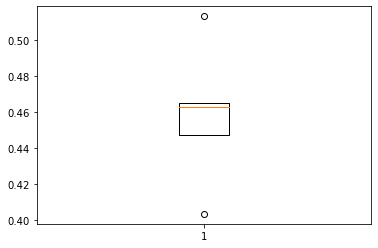

In [146]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

Performance on training set varies between 0.40 to 0.51.

In [147]:
#Calculating different metrics
scores_LR = get_metrics_score(lr)

Accuracy on training set :  0.8872742663656885
Accuracy on test set :  0.8871339256334321
Recall on training set :  0.4618086040386304
Recall on test set :  0.45491803278688525
Precision on training set :  0.7387640449438202
Precision on test set :  0.7424749163879598


* Logistic Regression has given a generalized performance on training and test set.
* Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 26)
After UpSampling, the shape of train_y: (11898,) 



### Logistic Regression on oversampled data

In [148]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

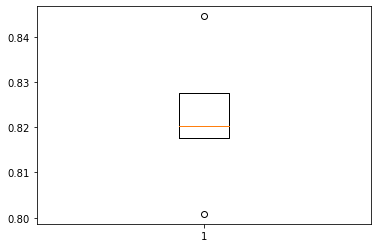

In [149]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.80 to 0.845, which is an improvement from the previous model
* Let's check the performance on the test set.

In [150]:
#Calculating different metrics
get_metrics_score(log_reg_over)

Accuracy on training set :  0.8180022573363431
Accuracy on test set :  0.8094768015794669
Recall on training set :  0.7787532923617209
Recall on test set :  0.7602459016393442
Precision on training set :  0.4607792207792208
Precision on test set :  0.44537815126050423


[0.8180022573363431,
 0.8094768015794669,
 0.7787532923617209,
 0.7602459016393442,
 0.4607792207792208,
 0.44537815126050423]

* Performance on the training set has improved and generalized well on test set as well.
* We are not overfitting the model.
* Recall score on test is good with 72%.

## Model building
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boost
5. XGBoost

In [80]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

RF: 66.81119097302728
GBM: 70.76396939485277
ADB: 69.79944354277764
XGB: 73.57485122497876
DTREE: 67.95115542159364


## Hyperparameter Tuning

**We will use pipelines with StandardScaler and  all the models and tune the models using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

**We can also use make_pipeline function instead of Pipeline to create a pipeline.**

**`make_pipeline`: This is a shorthand for the Pipeline constructor; it does not require, and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.**

**First, let's create a function to calculate different metrics so that we don't have to use the same code repeatedly for each model.**

In [81]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

## Grid SearchCV

### 1. Adaboost GridSearchCV

In [88]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 70} 
Score: 0.751537985933998
Wall time: 6min 55s


In [89]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

In [90]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

Accuracy on training set :  0.9672686230248307
Accuracy on test set :  0.9295820993747943
Recall on training set :  0.8709394205443372
Recall on test set :  0.7274590163934426
Precision on training set :  0.9210770659238626
Precision on test set :  0.8142201834862385


[0.9672686230248307,
 0.9295820993747943,
 0.8709394205443372,
 0.7274590163934426,
 0.9210770659238626,
 0.8142201834862385]

- The test recall has increased by ~3% as compare to cross validated recall
- The tuned adaboost model is not overfitting the training data

### 2. XGBoost GridSearchCV

In [91]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 1, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.7} with CV score=0.9157083236726177:
Wall time: 42min 49s


In [92]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [93]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

Accuracy on training set :  0.8538374717832957
Accuracy on test set :  0.8331688055281342
Recall on training set :  0.9683933274802459
Recall on test set :  0.9118852459016393
Precision on training set :  0.524488825487399
Precision on test set :  0.48954895489548955


[0.8538374717832957,
 0.8331688055281342,
 0.9683933274802459,
 0.9118852459016393,
 0.524488825487399,
 0.48954895489548955]

- The test recall has increased by ~18% as compared to the result from cross validation with default parameters.
- The model has generalized well on test data.

### 3. Decision Tree GridSearchCV

In [101]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {'decisiontreeclassifier__max_depth': np.arange(1,10), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10],
              'decisiontreeclassifier__min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__max_leaf_nodes': 5, 'decisiontreeclassifier__min_impurity_decrease': 0.01, 'decisiontreeclassifier__min_samples_leaf': 1} 
Score: 0.6216438673776954
Wall time: 1min 42s


In [102]:
# Creating new pipeline with best parameters
dt_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        random_state=1,
        max_depth=3,
        max_leaf_nodes=5,
        min_impurity_decrease=0.01,
        min_samples_leaf=1)
)

# Fit the model on training data
dt_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5,
                                        min_impurity_decrease=0.01,
                                        random_state=1))])

In [103]:
# Calculating different metrics
get_metrics_score(dt_tuned1)

Accuracy on training set :  0.904627539503386
Accuracy on test set :  0.9002961500493584
Recall on training set :  0.6259877085162423
Recall on test set :  0.6024590163934426
Precision on training set :  0.7403946002076843
Precision on test set :  0.7295285359801489


[0.904627539503386,
 0.9002961500493584,
 0.6259877085162423,
 0.6024590163934426,
 0.7403946002076843,
 0.7295285359801489]

* Model is not overfitting
* Test Recall has decreased after hyperparamter tuning. We will need to use RandomSearchCV to get better performance.

### 4. Random Forest GridSearchCV

In [104]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={'randomforestclassifier__max_depth': [3, None],
              "randomforestclassifier__max_features": [1, 3, 10],
              "randomforestclassifier__min_samples_split": [1, 3, 10],
              "randomforestclassifier__min_samples_leaf": [1, 3, 10],
              "randomforestclassifier__criterion": ["gini", "entropy"]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 10, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 10} with CV score=0.7006414715202102:
Wall time: 4min 58s


In [118]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        random_state=1,
        max_depth=None,
        max_features=10,
        min_samples_split=10,
        criterion='gini',
        min_samples_leaf=1)
)

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=10, min_samples_split=10,
                                        random_state=1))])

In [119]:
# Calculating different metrics
get_metrics_score(rf_tuned1)

Accuracy on training set :  0.9781320541760722
Accuracy on test set :  0.9292530437643962
Recall on training set :  0.8928884986830553
Recall on test set :  0.6639344262295082
Precision on training set :  0.9685714285714285
Precision on test set :  0.864


[0.9781320541760722,
 0.9292530437643962,
 0.8928884986830553,
 0.6639344262295082,
 0.9685714285714285,
 0.864]

* The model is a bit overfitting.
* No change in Recall score after hyperparameter tuning.

### 5. Gradient Boost GridSearchCV

In [107]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "gradientboostingclassifier__n_estimators": [100,150,200,250],
    "gradientboostingclassifier__subsample":[0.8,0.9,1],
    "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__max_features': 0.8, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__subsample': 0.8} 
Score: 0.745397635056805
Wall time: 6min 43s


In [117]:
# Creating new pipeline with best parameters
gb_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        random_state=1,
        n_estimators=250,
        max_features=0.8,
        subsample=0.8)
)

# Fit the model on training data
gb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.8, n_estimators=250,
                                            random_state=1, subsample=0.8))])

In [120]:
# Calculating different metrics
get_metrics_score(gb_tuned1)

Accuracy on training set :  0.9641647855530474
Accuracy on test set :  0.9374794340243501
Recall on training set :  0.8340649692712906
Recall on test set :  0.7172131147540983
Precision on training set :  0.9359605911330049
Precision on test set :  0.8706467661691543


[0.9641647855530474,
 0.9374794340243501,
 0.8340649692712906,
 0.7172131147540983,
 0.9359605911330049,
 0.8706467661691543]

* The model is not overfitting and genearlizing well on test data.
* Not much change in Recall score.

## RandomSearchCV

### 1. Adaboost GridSearchCV

In [121]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 100, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7471404281629183:
Wall time: 3min 24s


In [122]:
# Creating new pipeline with best parameters
abc_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "ABC",
            AdaBoostClassifier(
                random_state=1,
                n_estimators=100,
                learning_rate=1,
                base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1)
            ),
        ),
    ]
)
# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ABC',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

In [123]:
# Calculating different metrics
get_metrics_score(abc_tuned2)

Accuracy on training set :  0.9672686230248307
Accuracy on test set :  0.9295820993747943
Recall on training set :  0.8709394205443372
Recall on test set :  0.7274590163934426
Precision on training set :  0.9210770659238626
Precision on test set :  0.8142201834862385


[0.9672686230248307,
 0.9295820993747943,
 0.8709394205443372,
 0.7274590163934426,
 0.9210770659238626,
 0.8142201834862385]

### 2. XGBoost RandomSearchCV

In [124]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in RandomSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 10, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__gamma': 5} with CV score=0.9359069479867068:
Wall time: 2min 15s


In [125]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=100,
                scale_pos_weight=10,
                gamma=5,
                subsample=0.8,
                learning_rate= 0.2,
                eval_metric='logloss', max_depth = 2, reg_lambda = 10
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=10, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [126]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

Accuracy on training set :  0.8795146726862303
Accuracy on test set :  0.8654162553471537
Recall on training set :  0.961369622475856
Recall on test set :  0.9262295081967213
Precision on training set :  0.5748031496062992
Precision on test set :  0.5478787878787879


[0.8795146726862303,
 0.8654162553471537,
 0.961369622475856,
 0.9262295081967213,
 0.5748031496062992,
 0.5478787878787879]

### 3. Decision Tree RandomSearchCV

In [128]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {'decisiontreeclassifier__max_depth': np.arange(1,10), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10],
              'decisiontreeclassifier__min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, scoring=scorer, cv=5)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(randomized_cv.best_params_, randomized_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__min_samples_leaf': 20, 'decisiontreeclassifier__min_impurity_decrease': 0.01, 'decisiontreeclassifier__max_leaf_nodes': 5, 'decisiontreeclassifier__max_depth': 8} 
Score: 0.6216438673776954
Wall time: 1.6 s


In [129]:
# Creating new pipeline with best parameters
dt_tuned2 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        random_state=1,
        max_depth=8,
        max_leaf_nodes=5,
        min_impurity_decrease=0.01,
        min_samples_leaf=20)
)

# Fit the model on training data
dt_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=8, max_leaf_nodes=5,
                                        min_impurity_decrease=0.01,
                                        min_samples_leaf=20, random_state=1))])

In [131]:
# Calculating different metrics
get_metrics_score(dt_tuned2)

Accuracy on training set :  0.904627539503386
Accuracy on test set :  0.9002961500493584
Recall on training set :  0.6259877085162423
Recall on test set :  0.6024590163934426
Precision on training set :  0.7403946002076843
Precision on test set :  0.7295285359801489


[0.904627539503386,
 0.9002961500493584,
 0.6259877085162423,
 0.6024590163934426,
 0.7403946002076843,
 0.7295285359801489]

### 4. Random Forest RandomSearchCV

In [132]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

#Parameter grid to pass in RandomSearchCV
param_grid={'randomforestclassifier__max_depth': [3, None],
              "randomforestclassifier__max_features": [1, 3, 10],
              "randomforestclassifier__min_samples_split": [1, 3, 10],
              "randomforestclassifier__min_samples_leaf": [1, 3, 10],
              "randomforestclassifier__criterion": ["gini", "entropy"]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, scoring=scorer, cv=5)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__max_depth': None, 'randomforestclassifier__criterion': 'entropy'} with CV score=0.5987904783986397:
Wall time: 17.4 s


In [133]:
# Creating new pipeline with best parameters
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        random_state=1,
        max_depth=None,
        max_features=3,
        min_samples_split=3,
        criterion='entropy',
        min_samples_leaf=1)
)

# Fit the model on training data
rf_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_features=3,
                                        min_samples_split=3, random_state=1))])

In [134]:
# Calculating different metrics
get_metrics_score(rf_tuned2)

Accuracy on training set :  0.9998589164785553
Accuracy on test set :  0.9210266535044422
Recall on training set :  0.9991220368744512
Recall on test set :  0.5778688524590164
Precision on training set :  1.0
Precision on test set :  0.8924050632911392


[0.9998589164785553,
 0.9210266535044422,
 0.9991220368744512,
 0.5778688524590164,
 1.0,
 0.8924050632911392]

### 5. Gradient Boost RandomSearchCV

In [135]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "gradientboostingclassifier__n_estimators": [100,150,200,250],
    "gradientboostingclassifier__subsample":[0.8,0.9,1],
    "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, scoring=scorer, cv=5)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(randomized_cv.best_params_, randomized_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__subsample': 0.8, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__max_features': 0.7} 
Score: 0.7418811345544478
Wall time: 1min 45s


In [136]:
# Creating new pipeline with best parameters
gb_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        random_state=1,
        n_estimators=250,
        max_features=0.7,
        subsample=0.8)
)

# Fit the model on training data
gb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.7, n_estimators=250,
                                            random_state=1, subsample=0.8))])

In [137]:
# Calculating different metrics
get_metrics_score(gb_tuned2)

Accuracy on training set :  0.9617663656884876
Accuracy on test set :  0.937150378413952
Recall on training set :  0.8261633011413521
Recall on test set :  0.7131147540983607
Precision on training set :  0.928007889546351
Precision on test set :  0.8721804511278195


[0.9617663656884876,
 0.937150378413952,
 0.8261633011413521,
 0.7131147540983607,
 0.928007889546351,
 0.8721804511278195]

## Comparing all models

In [161]:
# defining list of models
models = [lr, log_reg_over, abc_tuned1, abc_tuned2, xgb_tuned1, xgb_tuned2, gb_tuned1, gb_tuned2, rf_tuned1, rf_tuned2, dt_tuned1, dt_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [160]:
comparison_frame = pd.DataFrame({"Model":[
    "Logistic Regression",
    "Logistic Regression Oversampling",
    "AdaBoost with GridSearchCV",
    "AdaBoost with RandomizedSearchCV",
    "XGBoost with GridSearchCV",
    "XGBoost with RandomizedSearchCV",
    "GradientBoost with GridSearchCV",
    "GradientBoost with RandomizedSearchCV",
    "RandomForest with GridSearchCV",
    "RandomForest with RandomizedSearchCV",
    "DecisionTree with GridSearchCV",
    "DecisionTree with RandomizedSearchCV"],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
5,XGBoost with RandomizedSearchCV,0.879515,0.865416,0.961370,0.926230,0.574803,0.547879
4,XGBoost with GridSearchCV,0.853837,0.833169,0.968393,0.911885,0.524489,0.489549
1,Logistic Regression Oversampling,0.818002,0.809477,0.778753,0.760246,0.460779,0.445378
2,AdaBoost with GridSearchCV,0.967269,0.929582,0.870939,0.727459,0.921077,0.814220
3,AdaBoost with RandomizedSearchCV,0.967269,0.929582,0.870939,0.727459,0.921077,0.814220
6,GradientBoost with GridSearchCV,0.964165,0.937479,0.834065,0.717213,0.935961,0.870647
7,GradientBoost with RandomizedSearchCV,0.961766,0.937150,0.826163,0.713115,0.928008,0.872180
8,RandomForest with GridSearchCV,0.978132,0.929253,0.892888,0.663934,0.968571,0.864000
10,DecisionTree with GridSearchCV,0.904628,0.900296,0.625988,0.602459,0.740395,0.729529
11,DecisionTree with RandomizedSearchCV,0.904628,0.900296,0.625988,0.602459,0.740395,0.729529


- The XGboost model tuned using randomised search is giving the best test recall of 0.92.
- Time taken by RandomSearchCV is quite less than GridSearchCV for all the models.
- Let's see the feature importance from the tuned xgboost model

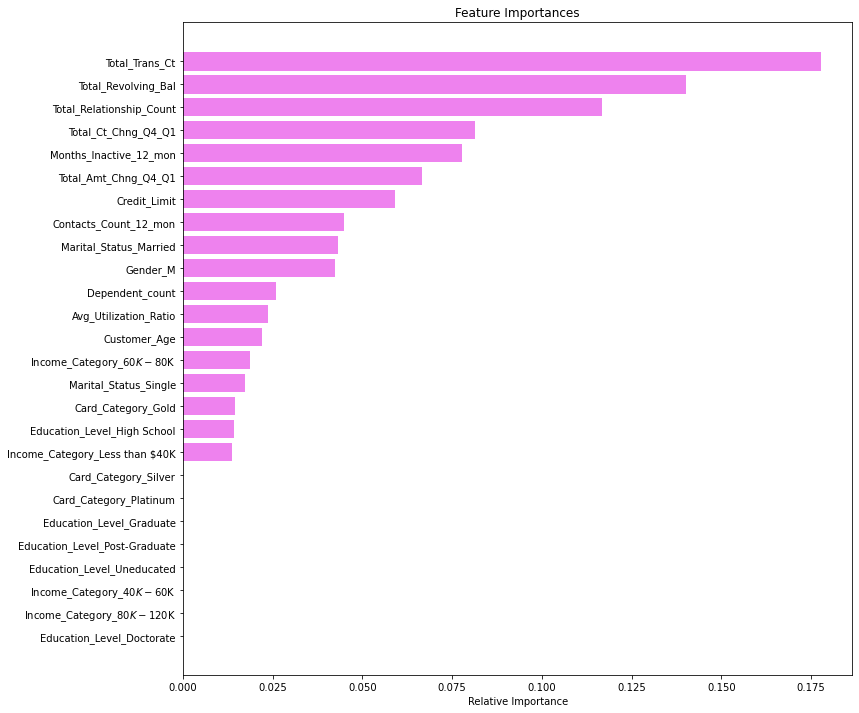

In [162]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* `Total_Trans_Ct` is the most important feature, follwed by `Total_Revolving_Bal`& `Total_Relationship_Count`